In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import absolute, mean, std
from sklearn import linear_model, metrics
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, ElasticNet, MultiTaskElasticNetCV
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, r2_score, mean_squared_error

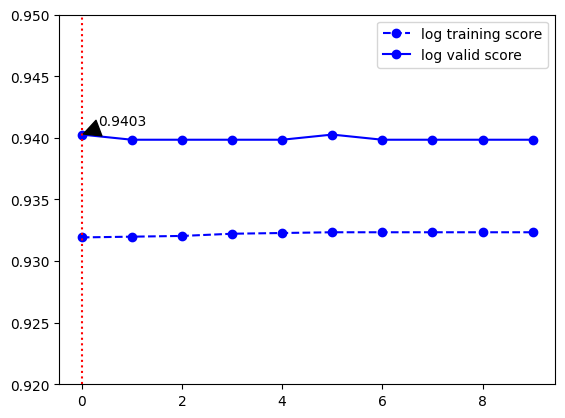

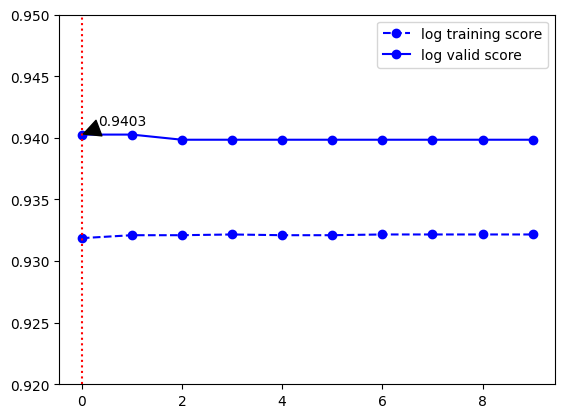

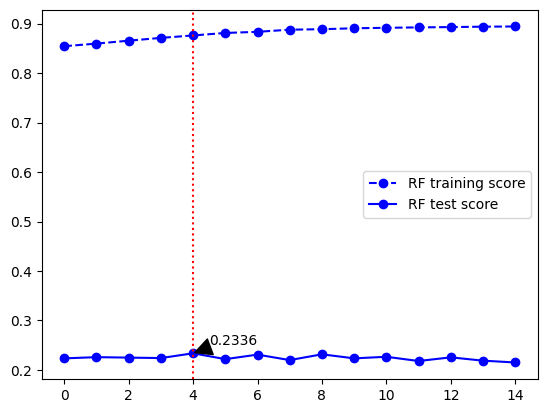

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************


In [4]:
%run Data_preprocessing.ipynb

## Task 1


In [5]:
# Find most suitable index that can make the model perform best
l1_ratio_list=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
c_list=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


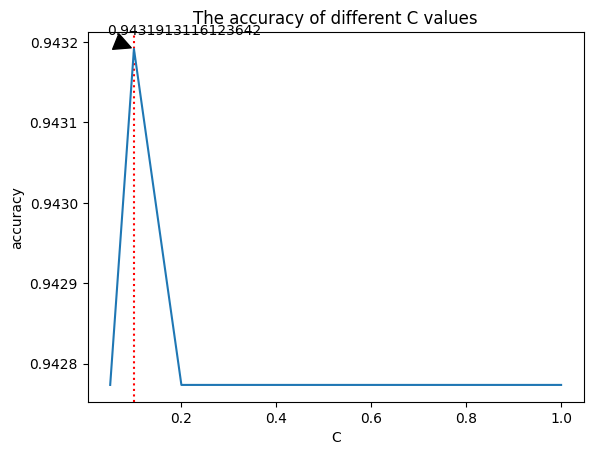

In [6]:
# train the logistic model with different c
import matplotlib.pyplot as plt

accuracy_list=[]
for c in c_list:
    clf = LogisticRegression(C= c, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=0.5).fit(X_train_selected_t1, y_train_t1_value)
    accuracy=clf.score(X_valid_selected_t1, y_valid_t1_value)
    accuracy_list.append(accuracy)
    #print("accuracy of ", c ," : ", accuracy)
max_accuracy=max(accuracy_list)
index=accuracy_list.index(max_accuracy)
loc=c_list[index]
plt.title("The accuracy of different C values")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_accuracy, (loc, max_accuracy), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(c_list, accuracy_list)
#find best C: 0.1

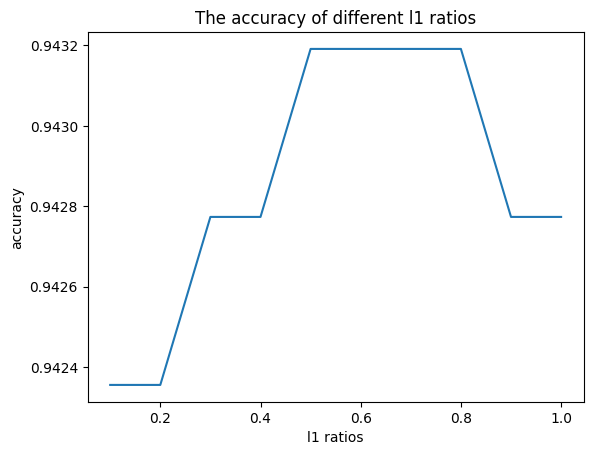

In [55]:
# train the logistic model with different l1 ratio
accuracy_list2=[]
for l1_ratio in l1_ratio_list:
    clf = LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=l1_ratio).fit(X_train_selected_t1, y_train_t1_value)
    accuracy=clf.score(X_valid_selected_t1, y_valid_t1_value)
    #print("accuracy of ", l1_ratio," l1 ratio :", accuracy)
    accuracy_list2.append(accuracy)

plt.title("The accuracy of different l1 ratios")
plt.xlabel("l1 ratios")
plt.ylabel("accuracy")
plt.plot(l1_ratio_list, accuracy_list2)
#find best l1-ratio: 0.5-0.8


Output the prediction


In [9]:
clf1 = LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.7).fit(X_train_selected_t1, y_train_t1_value)
y_pred_1=clf1.predict(X_test_selected_t1)
datas=y_pred_1.tolist()#turn result into list
#print(datas)

In [52]:

pd.DataFrame(y_pred_1).to_excel(excel_writer=r"C:\Users\gcq20\Desktop\STAT3612\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project-\result_1.xlsx")

Model Performance

In [6]:
clf1 = LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.7).fit(X_train_selected_t1, y_train_t1_value)
print(clf1.score(X_valid_selected_t1, y_valid_t1_value))
y_pred_1=clf1.predict(X_valid_selected_t1)

0.9431913116123642


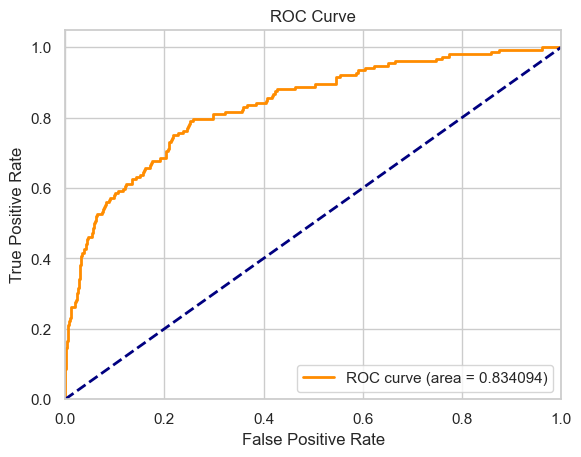

In [8]:
cm=confusion_matrix(y_valid_t1_value, y_pred_1)
y_valid_score=clf1.decision_function(X_valid_selected_t1)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

Normalized

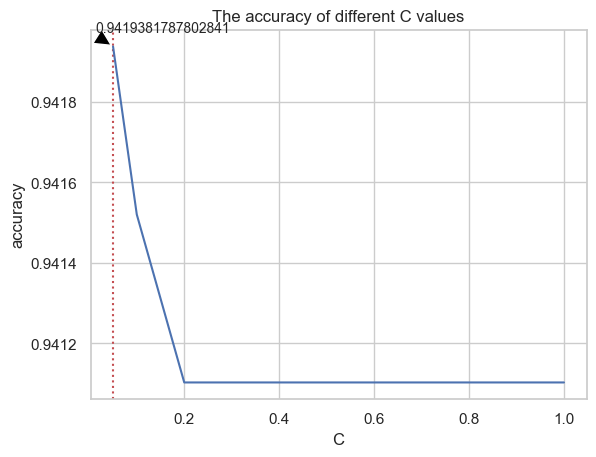

In [16]:
# train the logistic model with different c
import matplotlib.pyplot as plt

accuracy_list=[]
for c in c_list:
    clf = LogisticRegression(C= c, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=0.5).fit(X_train_selected_t1_norm, y_train_t1_value)
    accuracy=clf.score(X_valid_selected_t1_norm, y_valid_t1_value)
    accuracy_list.append(accuracy)
    #print("accuracy of ", c ," : ", accuracy)
max_accuracy=max(accuracy_list)
index=accuracy_list.index(max_accuracy)
loc=c_list[index]
plt.title("The accuracy of different C values")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.axvline(x=loc, linestyle="dotted", color='r')
plt.annotate(max_accuracy, (loc, max_accuracy), xycoords="data", xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10, horizontalalignment="center", verticalalignment="top")
plt.plot(c_list, accuracy_list)
#find best C: 0.05

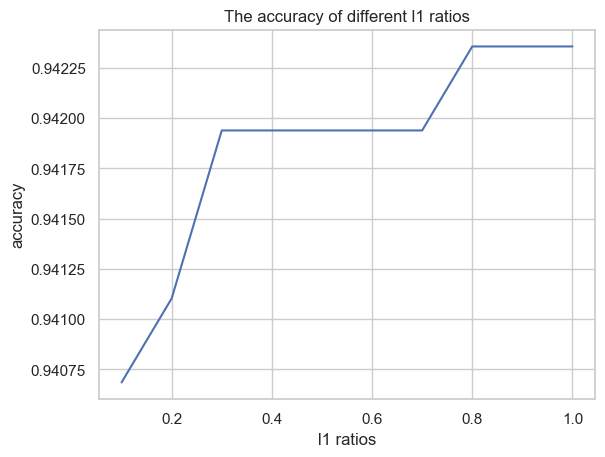

In [17]:
# train the logistic model with different l1 ratio
accuracy_list2=[]
for l1_ratio in l1_ratio_list:
    clf = LogisticRegression(C=0.05, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=l1_ratio).fit(X_train_selected_t1_norm, y_train_t1_value)
    accuracy=clf.score(X_valid_selected_t1_norm, y_valid_t1_value)
    print("accuracy of ", l1_ratio," l1 ratio :", accuracy)
    accuracy_list2.append(accuracy)

plt.title("The accuracy of different l1 ratios")
plt.xlabel("l1 ratios")
plt.ylabel("accuracy")
plt.plot(l1_ratio_list, accuracy_list2)
#find best l1-ratio: 0.8-1.0

Output the prediction


In [7]:
clf2 = LogisticRegression(C=0.05, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.9).fit(X_train_selected_t1_norm, y_train_t1_value)
print(clf2.score(X_valid_selected_t1_norm, y_valid_t1_value))
y_pred_2=clf2.predict(X_valid_selected_t1_norm)

0.9423558897243107


In [26]:
pd.DataFrame(y_pred_1).to_excel(excel_writer=r"C:\Users\gcq20\Desktop\STAT3612\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project--main\Jebva-LOS-and-Mortality-Project-\normalized.xlsx")

Model performance


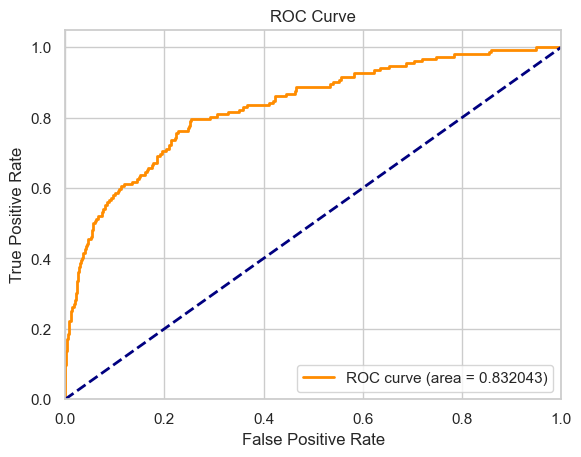

In [21]:
cm=confusion_matrix(y_valid_t1_value, y_pred_2)
y_valid_score=clf2.decision_function(X_valid_selected_t1_norm)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")